In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# pd.set_option('display.width', 500)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

## TL;DR
When we talked about expectations we described them as a weighted average that visits each point in the probability space and evaluates a "value" function there, weighted by that point's probability.

The LLN says "Don't be sucker; the way to find the average opinion among Americans about Obamacare isn't to ask every single person, it's to take a random sample. You don't need to eat a whole bowl of soup to know if it's too salty; you just need a well-mixed spoonful". Indeed, the LLN says that as we sample (randomly and independently) more and more points in the probability space our running sample average will converge to the expected value calculated on the full space.

In short: the expected value of a distribution/random variable can (with enough draws from the distribution) be replaced by the emprical average of the n draws. The LLN does not [by itself] promise this happens for any reasonable n, though.

### Small print
Technically the LLN and friends are what says that sample polls will work, rather than the other way around. Read on for the full story.

## The Law of Large Numbers
The law of large numbers studies the "running expected value" of an infinite series of random numbers. For instance, a candidate for study would be the random variables $X_1,X_2,X_3,...$ where $X_i$ is the number showing on a die with $i$ sides. The LLN wants to make a statement about the _distribution_ of the running average of these die rolls. (We'll say what that statement is in a second).

For intuition, consider a class of 10,000 grad students who, with nothing better to do, sign up to participate in this die-rolling experiment.That is, each one rolls a 1-sided die, then a 2-sided die, then a 3-sided, and so on. Suppose we check in on the students after the 10-sided die roll. Each student is tracking the running average they have seen, but of course each student has a different average based on how thier dice came up. We could make a histogram of each student's running average. THAT HISTOGRAM is what the LLN wants to talk about: how popular each possible running average is.

So, what's the LLN's promise? Roughly, the LLN's says that the histogram at time 1000 and 2000 and 3000 and so on gets narrower and narrower. In different terms, this means that if you and your friend are both part of the dice rolling experiment your running averages will eventually start to match. In fact, we could precisely state the LLN as "The chance of finding a student whose personal running average is more than epsilon from the histogram mean becomes zero". Moreover, this assures us that if you and your friend both undertake the die-rolling process your running averages will eventually agree.

This is _fantastic_ news for people who simulate things (i.e. us)! You know, for certain, that with infinite trials you can force your particular running average to be arbitrarially close to the average anyone replicating your experiment would get.

Generalizing our die rolling experiment: Any time a we're about to collect a bunch of independent random numbers, as the number of random numbers collected grows to infinity we can be sure that the particular running average we have isn't too different from the mean of the overall population of running averages.

### In symbols
If $X_i$ is a sequence of random variables and $\bar X_n$ is the (random) running average after n variables have been observed, then as $n\rightarrow\infty$
$$\bar X_n \rightarrow E[\bar X_n]$$
Where the expectation can be seen as the average over the population of possible values of the running average at time n.


### Small print:
The LLN requires each variable in the sequence be independent. 

As a subtlty, notice that the running averages are NOT YET promised to home in on a fixed value. The histogram of possible running averages might be centered at 100 early on and then centered on 200 and then 300 and so on, such that . But we know for sure that if the die rolls are independent the histogram will get tighter and tighter, and chance of finding a running average that is far from the mean will get smaller and smaller.

The LLN can be broken by cleverly designed sequences. For instance designing every 100th random variable a huge enough variance to swamp all previous values would break the LLN. The a condition for good behavior is that each random variable in the sequence has finite variance and the variances don't grow too quickly (see Kolmogorov's strong law).

## An extra assumption and useful result
If we add an assumption that each random variable has the same mean (call it $\mu$, we can strengthen the LLN to specify that the particular running average we have converges to $\mu$. This is especially nice beacause many, many experiments can be though of as independent draws from a distribution. 

For intance, there is some distribution of possible values a particular sensor in the LHC will measure the next time we smash two protons together. We very likely don't know what it is because the distribution folds in measurement error, differences in how the protons are accalerated, etc., but there IS some distribution that would emerge with enough trials. Even though we don't know anything about the LHC sensor observation distribution, we know that the running average of lots of draws from that distribution (i.e. the running average of lots of values recorded by that sensor) will converge to the distribution's overall mean.

More plainly: if the the $X_i$ are really just independent replications of the same random variable $X$ and thus all follow the same distribution, the average of $n$ such replications homes in on $X$'s / the distribution's true mean $\mu$, whatever that value may be.

### In symbols
If $\bar X_n$ is the average of $n$ independent observations of $X$, and $X$ has mean $\mu$ then $\bar X_n \rightarrow \mu$ as $n\rightarrow\infty$

### Useage
For practical purposes, this version of the LLN means that (with $n$ big enough) we can approximate an expectation arbitrarially well by repeatedly drawing or simulating from that distribution instead of crunching integrals.

If it happens that $X$ is $r(Z)$ i.e. X is a transformation of a different random variable/distribution, we can approximate $E[X]$ by drawing samples from the distribution of Z, running each sample value through r, and averaging those values. (This is just LOTUS: $E[X]=E[r(Z)]=\int{r(z)f(z)dz}$, where $f$ is the distribution function for $Z$). In words, $E[X)$ is the same as 

## A nice example
Here we consider some crazy distribution (the product of a normal and an exponential) and hire some grad students to repeatedly draw from that distribution and track thier personal running total in the plot below. Each grad student has a different color.

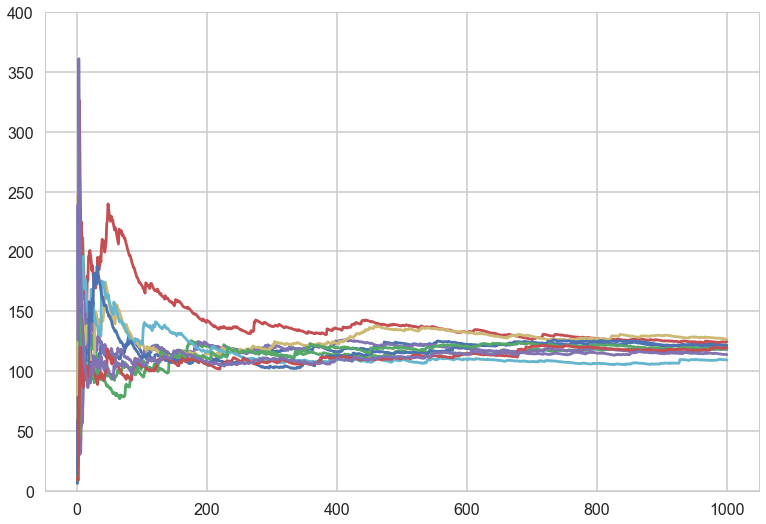

In [26]:
def crazy_distribution(n):
    chi = np.random.chisquare(3,n)
    exp = np.random.exponential(40,n)
    return chi*exp

n=1000
n_students=10
for _ in range(n_students):
    random_flips = crazy_distribution(n)
    #cumsum is a nice numpy function for "the total so far"
    running_sum = np.cumsum(random_flips)
    #holds the denominator at each index
    sequence_lengths = np.array(range(1,n+1))
    #divide to get the overall mean
    running_means = running_sum / sequence_lengths
    plt.plot(sequence_lengths, running_means);
    plt.ylim(0,400)
    #plt.xscale('log')

You can see that the running totals are all over the place when each student only has a few samples, but begin to settle down as the number of samples grows. Each particular student/experimenter closes in on the true average. Even though we don't know what the true average is off hand, we can tell that it's somewhere in the range of 110-130.

**Exercise:** Try playing with the number of grad students and number of draws to get a sense for what the true average is, and how the individual traces behave over time.

## A nicer example
Imagine a sequence of n coin flips. Lets keep increasing the length of the sequence and compute a running average $S_n$ of the coin-flip random variables,
$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i .$$

We plot this running mean, and notice that it *converges to the mean of the distribution from which the random variables are plucked*, ie the Bernoulli distribution with p=0.5. 

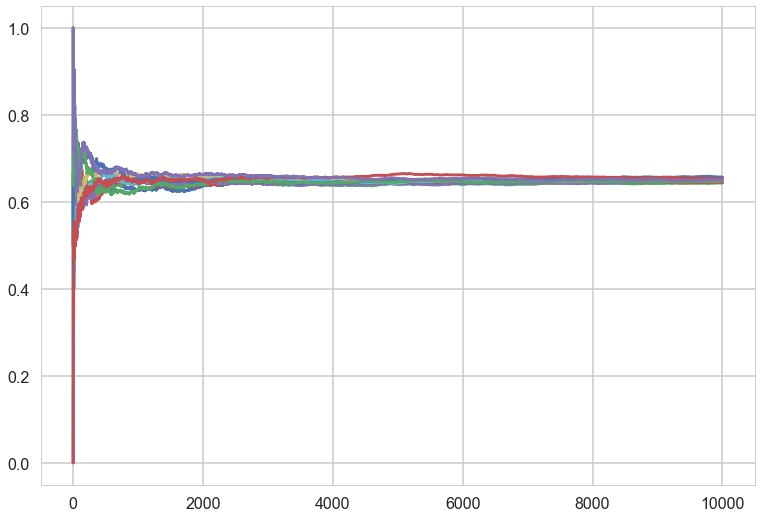

In [3]:
from scipy.stats.distributions import bernoulli

prob_of_heads=.65

def throw_a_coin(n):
    brv = bernoulli(prob_of_heads)
    return brv.rvs(size=n)


n=10000
n_students=10
for _ in range(n_students):
    random_flips = throw_a_coin(n)
    #cumsum is a nice numpy function for "the total so far"
    running_sum = np.cumsum(random_flips)
    #holds the denominator at each index
    sequence_lengths = np.array(range(1,n+1))
    #divide to get the overall mean
    running_means = running_sum / sequence_lengths
    plt.plot(sequence_lengths, running_means);
    #plt.xscale('log')

Again, we see the traces converging to the mean of the distribution. Becuase the outcomes recorded are either 1 (heads) or 0 (not heads) the mean of the distribution is ALSO the probability of getting a 1 (heads).

##  Frequentist interpretation of probability

The law of large numbers is what makes the **frequentist** interpretation of probability possible to use in practise. 

We saw from the LOTUS that if we consider any event $A$ from a probability distribution $F$ with random variable X, and consider the indicator function $I_A$ such that:

$$\begin{eqnarray}
I_A(x) = 1 \,&& if \, x \in A\\
I_A(x) = 0 \,&&  otherwise
\end{eqnarray}$$

we have that:

$$E_{F}[I_A (X)] = p(X \in A)$$

One can think of variable $Z=I_A(X)$ as Bernoulli random variable with parameter p = P(A).  The question then arises: how do we estimate this expectation value and thus the probability?

Now we know that if we take a long sequence from $X$ (which we can transofrm into a sequence from $Z$ by running each outcome through the inicator function), then the frequency of successes (where success means being in A) will converge by the law of large numbers to the true probability p(A).

So we could write an indicator function for a complicated event like "The best hand at a poker table is a three of a kind" and simulate hands, scoring cases where the best hand IS a three of a kind as 1 and the rest as zero. The long-run average of those stored values will then approximate the actual probability of three of a kind being the best hand.